In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
csv_url = 'https://raw.githubusercontent.com/openZH/covid_19/master/COVID19_Fallzahlen_CH_total_v2.csv'
df = pd.read_csv(csv_url, parse_dates=['date'])

In [5]:
df_ne = df[df.abbreviation_canton_and_fl == 'NE']
df_ne[['date', 'ncumul_deceased']]

,date,ncumul_deceased
66,2020-03-01,NaN
78,2020-03-02,NaN
91,2020-03-03,NaN
106,2020-03-04,NaN
123,2020-03-05,NaN
...,...,...
2359,2020-06-08,NaN
2384,2020-06-09,NaN
2404,2020-06-10,NaN
2421,2020-06-11,NaN


In [6]:
df_ne_ffill = df_ne.fillna(method='ffill')
df_ne_ffill[['date', 'ncumul_deceased']]

,date,ncumul_deceased
66,2020-03-01,NaN
78,2020-03-02,NaN
91,2020-03-03,NaN
106,2020-03-04,NaN
123,2020-03-05,NaN
...,...,...
2359,2020-06-08,83.0
2384,2020-06-09,83.0
2404,2020-06-10,83.0
2421,2020-06-11,83.0


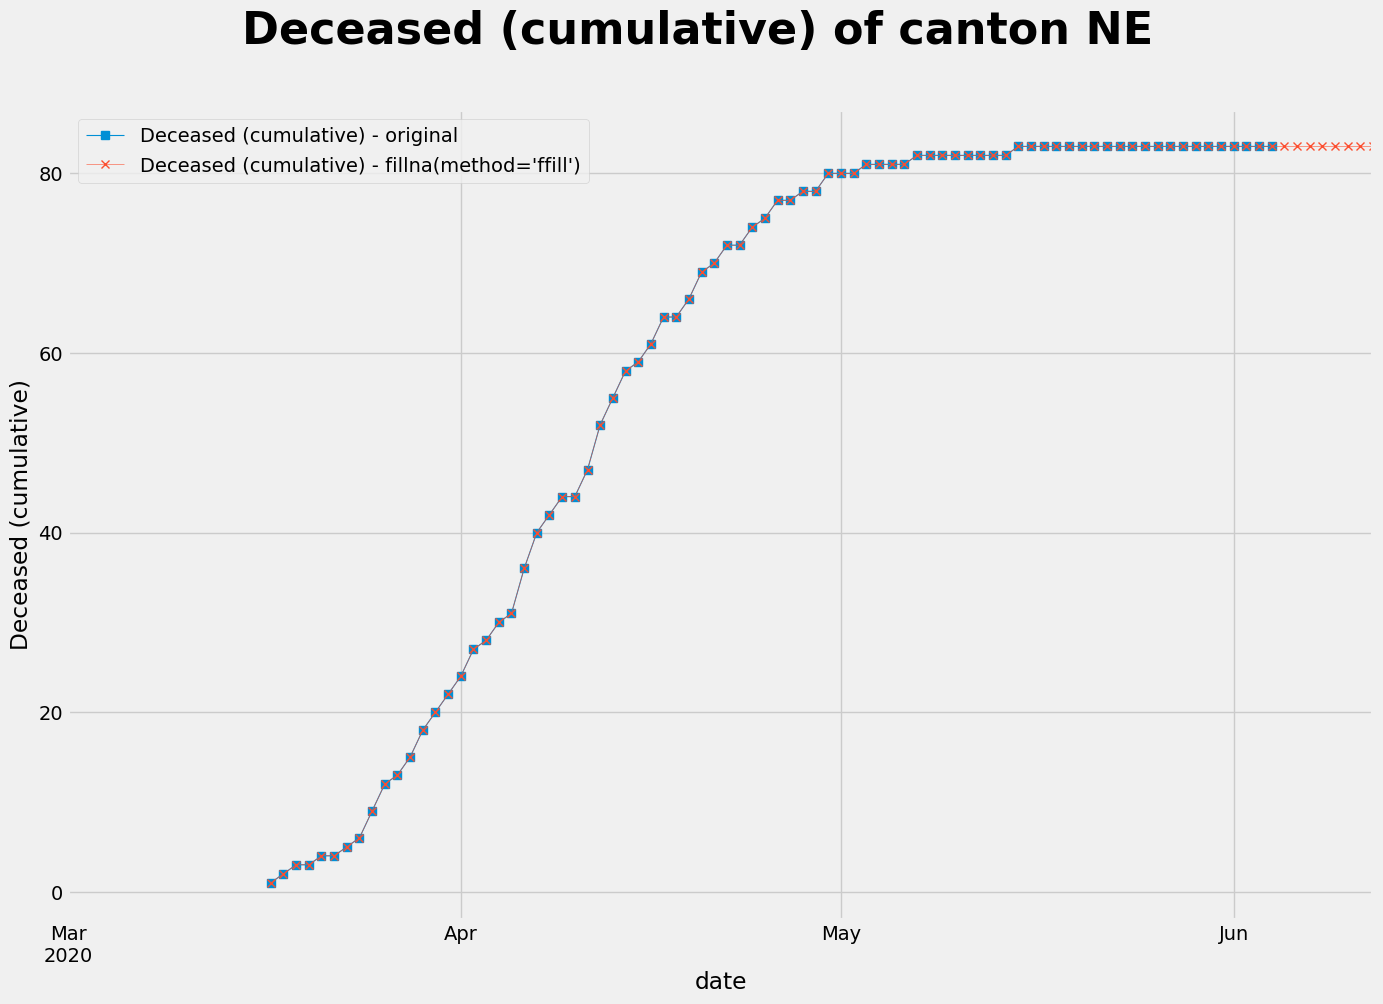

In [15]:
# quick plot comparison between the two datasets
plt.style.use('default')
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle('Deceased (cumulative) of canton NE', fontsize=32, fontweight='bold');
ax.set_ylabel('Deceased (cumulative)')
ax.set_xlabel('Date')

df_ne.plot(kind='line', y='ncumul_deceased', marker='s', x="date", label=f"Deceased (cumulative) - original", ax=ax, linewidth=0.8)
df_ne_ffill.plot(kind='line', marker='x', y='ncumul_deceased', x="date", label=f"Deceased (cumulative) - fillna(method='ffill')", ax=ax, linewidth=0.4)

plt.show()